Importing Libraries

In [4]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import layers, models

Loading the dataset and performing basic data scaling and resizing.

In [2]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
print('The dataset contains a total', len(x_train) + len(x_test))
print('Number images used for training', len(x_train))
print('Number images used for testing', len(x_test))
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255
onehot_train = keras.utils.to_categorical(y_train, 10)
onehot_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step
The dataset contains a total 60000
Number images used for training 50000
Number images used for testing 10000


Constructing the CNN model and training it

In [11]:
cnnmodel = Sequential()
cnnmodel.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
cnnmodel.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
cnnmodel.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
cnnmodel.add(Dropout(0.3))
cnnmodel.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
cnnmodel.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
cnnmodel.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
cnnmodel.add(Dropout(0.3))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(512, activation = 'relu'))
cnnmodel.add(Dropout(0.8))
cnnmodel.add(Dense(10, activation = 'softmax'))
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']
cnnmodel.compile(loss = loss, optimizer = opt, metrics = metrics)
hist = cnnmodel.fit(x_train, onehot_train, batch_size = 64 , epochs = 100, validation_split = 0.2)

Epoch 1/100
625/625 [==============================] - 6s 5ms/step - loss: 1.7847 - accuracy: 0.3376 - val_loss: 1.3828 - val_accuracy: 0.4973
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.3927 - accuracy: 0.4970 - val_loss: 1.1676 - val_accuracy: 0.5736
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.2399 - accuracy: 0.5546 - val_loss: 1.0403 - val_accuracy: 0.6292
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.1369 - accuracy: 0.5920 - val_loss: 0.9733 - val_accuracy: 0.6545
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.0597 - accuracy: 0.6259 - val_loss: 0.8822 - val_accuracy: 0.6880
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.0049 - accuracy: 0.6460 - val_loss: 0.8545 - val_accuracy: 0.6938
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 0.9596 - accuracy: 0.6611 - val_loss: 0.8106 - val_accuracy: 0.7134

Testing the model

In [18]:
results = cnnmodel.evaluate(x_test, onehot_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.6750 - accuracy: 0.7939
[0.6749776601791382, 0.7939000129699707]


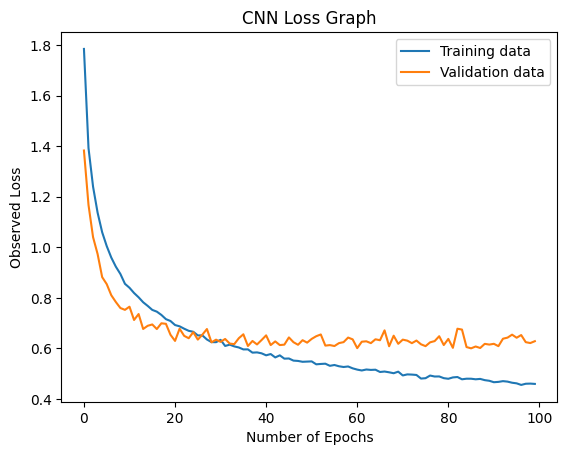

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('CNN Loss Graph')
plt.ylabel('Observed Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.show()

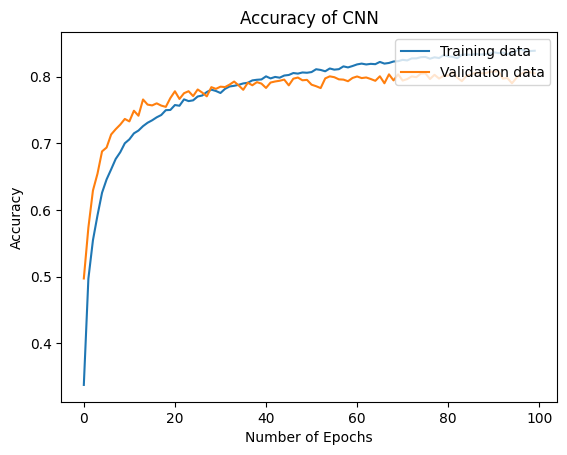

In [31]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy of CNN')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.show()

Constructing the LeNet-5 model and training it


In [5]:
lenet = Sequential()
lenet.add(Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'))
lenet.add(AveragePooling2D())
lenet.add(Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'))
lenet.add(AveragePooling2D())
lenet.add(Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'))
lenet.add(Flatten())
lenet.add(Dense(84, activation='relu'))
lenet.add(Dense(10, activation='softmax'))
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
hist1 = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 18s 4ms/step - loss: 1.6379 - accuracy: 0.3980 - val_loss: 1.4301 - val_accuracy: 0.4784
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3722 - accuracy: 0.5080 - val_loss: 1.3084 - val_accuracy: 0.5246
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2601 - accuracy: 0.5469 - val_loss: 1.2786 - val_accuracy: 0.5403
Epoch 4/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1827 - accuracy: 0.5779 - val_loss: 1.2101 - val_accuracy: 0.5686
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1150 - accuracy: 0.6039 - val_loss: 1.1327 - val_accuracy: 0.5975
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0604 - accuracy: 0.6244 - val_loss: 1.1116 - val_accuracy: 0.6079
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0174 - accuracy: 0.6405 - val_loss: 1.0853 - val_a

Testing the model

In [19]:
results2 = lenet.evaluate(x_test, y_test)
print(results2)

313/313 [==============================] - 1s 2ms/step - loss: 4.5316 - accuracy: 0.5800
[4.531588077545166, 0.5799999833106995]


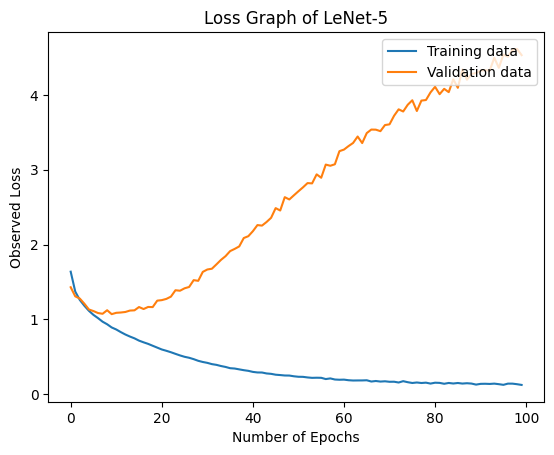

In [32]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Loss Graph of LeNet-5')
plt.ylabel('Observed Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.show()

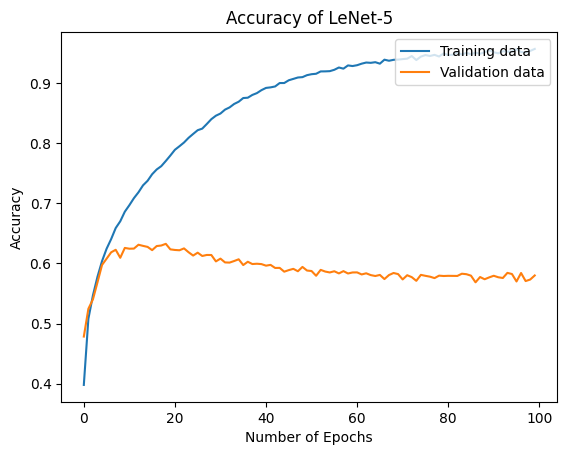

In [33]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Accuracy of LeNet-5')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.show()

Building the Resnet model and training it

In [7]:
def extractingfeatures(imageinput):
  extractingfeatures = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')(imageinput)
  return extractingfeatures
def categorizer(imageinput):
    temp = tf.keras.layers.GlobalAveragePooling2D()(imageinput)
    temp = tf.keras.layers.Flatten()(temp)
    temp = tf.keras.layers.Dense(1024, activation="relu")(temp)
    temp = tf.keras.layers.Dense(512, activation="relu")(temp)
    temp = tf.keras.layers.Dense(10, activation="softmax", name="classification")(temp)
    return temp
def build_model(imageinput):
    resizing = tf.keras.layers.UpSampling2D(size=(7,7))(imageinput)
    feature_extraction = extractingfeatures(resizing)
    resnet_output = categorizer(feature_extraction)
    return resnet_output
def compilingmodel():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  classification_output = build_model(inputs)
  resnetmodel = tf.keras.Model(inputs=inputs, outputs = classification_output)
  resnetmodel.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
  return resnetmodel
resnet = compilingmodel()

94765736/94765736 [==============================] - 3s 0us/step


In [9]:
history3 = resnet.fit(x_train, y_train, epochs=5, validation_data = (x_test, y_test), batch_size=64)

Epoch 1/5
782/782 [==============================] - 179s 207ms/step - loss: 0.4599 - accuracy: 0.8474 - val_loss: 1.6215 - val_accuracy: 0.4970
Epoch 2/5
782/782 [==============================] - 160s 205ms/step - loss: 0.1230 - accuracy: 0.9595 - val_loss: 0.2107 - val_accuracy: 0.9282
Epoch 3/5
782/782 [==============================] - 160s 205ms/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.2649 - val_accuracy: 0.9184
Epoch 4/5
782/782 [==============================] - 160s 205ms/step - loss: 0.0163 - accuracy: 0.9963 - val_loss: 0.1899 - val_accuracy: 0.9464
Epoch 5/5
782/782 [==============================] - 160s 205ms/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.1988 - val_accuracy: 0.9455


Testing the model

In [20]:
results3 = resnet.evaluate(x_test, y_test)
print(results3)

313/313 [==============================] - 10s 30ms/step - loss: 0.1988 - accuracy: 0.9455
[0.19881822168827057, 0.9455000162124634]


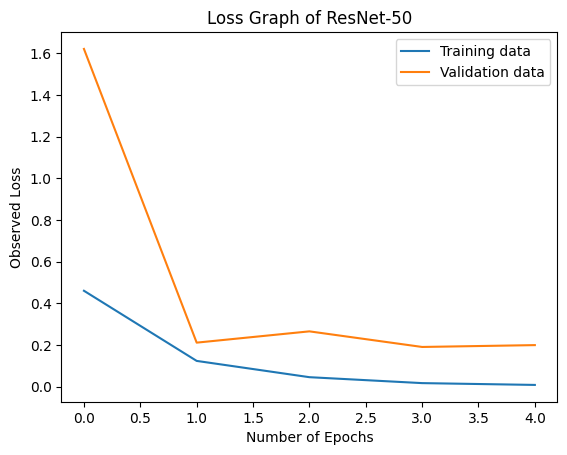

In [34]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss Graph of ResNet-50')
plt.ylabel('Observed Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.show()

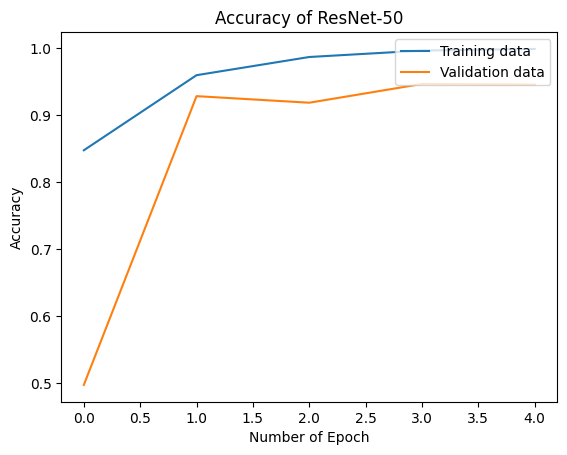

In [35]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy of ResNet-50')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.show()